In [1]:
import os as os 

In [2]:
os.chdir("/Users/girishkamath/Desktop/Python Directory")

In [3]:
os.getcwd()

'/Users/girishkamath/Desktop/Python Directory'

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

# Reading Dataset

In [5]:
data=pd.DataFrame(pd.read_excel("Win_Prediction_Data.xlsx"))

In [6]:
data_copy=data

In [7]:
data.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost


In [8]:
data.shape

(10061, 9)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Client Category   9982 non-null   object        
 1   Solution Type     10061 non-null  object        
 2   Deal Date         10061 non-null  datetime64[ns]
 3   Sector            10061 non-null  object        
 4   Location          10061 non-null  object        
 5   VP Name           10061 non-null  object        
 6   Manager Name      10061 non-null  object        
 7   Deal Cost         10061 non-null  float64       
 8   Deal Status Code  10061 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 707.5+ KB


In [10]:
data.describe()

,Deal Cost
count,1.006100e+04
mean,7.668969e+05
std,1.619894e+06
min,0.000000e+00
25%,1.897059e+05
50%,3.823529e+05
75%,7.647059e+05
max,3.676471e+07


# Treating Missing Values 

In [11]:
data.isnull().sum()

Client Category     79
Solution Type        0
Deal Date            0
Sector               0
Location             0
VP Name              0
Manager Name         0
Deal Cost            0
Deal Status Code     0
dtype: int64

In [12]:
data['Client Category'].value_counts()

Others                   1763
Internal                 1454
Services_based           1202
Tech                      913
Domestic Public Bank      419
International Bank        376
Consulting                352
Finance                   339
Telecom                   327
Power ind                 264
Domestic Private Bank     262
Insurance                 247
Consumer Good             185
Automobiles               178
Infrastructure            152
Domestic Bank             134
Retail_market             126
Govt                      121
Hospitality               119
Manufacturing             117
Pharma                    110
Healthcare                 99
Electronics                81
Media_Journal              71
Industries                 66
Research Development       63
Energy                     57
Knowledge                  50
Management                 43
Govt Bank Special          41
Payment                    40
Energy                     37
e-commerce                 32
Airpline  

In [13]:
data["Client Category"].fillna('Others', inplace=True)

In [14]:
data.isnull().sum()

Client Category     0
Solution Type       0
Deal Date           0
Sector              0
Location            0
VP Name             0
Manager Name        0
Deal Cost           0
Deal Status Code    0
dtype: int64

In [15]:
(data["Deal Cost"] == 0).value_counts()

False    9815
True      246
Name: Deal Cost, dtype: int64

In [16]:
zero= data[data['Deal Cost'] == 0]
zero.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
79,Govt,Solution 37,2011-11-20,Sector 12,L5,Ekta Zutshi,shafibul,0.0,Lost
95,Others,Solution 31,2011-11-07,Sector 16,L5,Rosanna Maynez,Ankita Aggarwal,0.0,Lost
139,Govt,Solution 37,2012-02-06,Sector 12,L5,Ekta Zutshi,shafibul,0.0,Lost
150,Others,Solution 31,2012-03-23,Sector 16,L5,Rosanna Maynez,Ankita Aggarwal,0.0,Lost
210,Domestic Public Bank,Solution 59,2012-06-12,Sector 2,L10,Mervin Harwood,Lino Batterton,0.0,Lost


<AxesSubplot:xlabel='Deal Cost', ylabel='Density'>

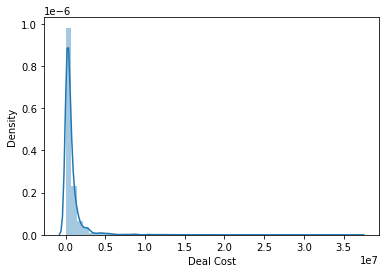

In [17]:
sns.distplot(data["Deal Cost"])

In [18]:
median=data[data["Deal Cost"]!=0].groupby("Deal Status Code").median().iloc[0]["Deal Cost"]
median

441176.47

In [19]:
def Deal_Cost_Median(Deal_Cost):
    if Deal_Cost == 0:
        return median
    else:
        return Deal_Cost

In [20]:
data['Deal Cost']= data['Deal Cost'].apply(Deal_Cost_Median)

In [21]:
data.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost


In [22]:
(data["Deal Cost"] == 0).value_counts()

False    10061
Name: Deal Cost, dtype: int64

# Data Visualization

In [23]:
data["Deal Status Code"].value_counts()

Lost    6306
Won     3755
Name: Deal Status Code, dtype: int64

Text(0, 0.5, ' Deal Status Code')

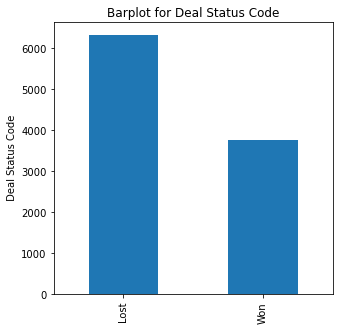

In [24]:
plt.figure(figsize=(5,5))
data["Deal Status Code"].value_counts().plot(kind="bar")
plt.title("Barplot for Deal Status Code")
plt.ylabel(" Deal Status Code")

In [25]:
Deal_Status_Client_Category=pd.crosstab(index=data["Client Category"], columns=data["Deal Status Code"])
Deal_Status_Client_Category

Deal Status Code,Lost,Won
Client Category,,
Airpline,22,5
Automobiles,112,66
Consulting,182,170
Consumer Good,98,87
Domestic Bank,78,56
Domestic Private Bank,176,86
Domestic Public Bank,324,95
Electronics,54,27
Energy,32,25


<AxesSubplot:xlabel='Client Category'>

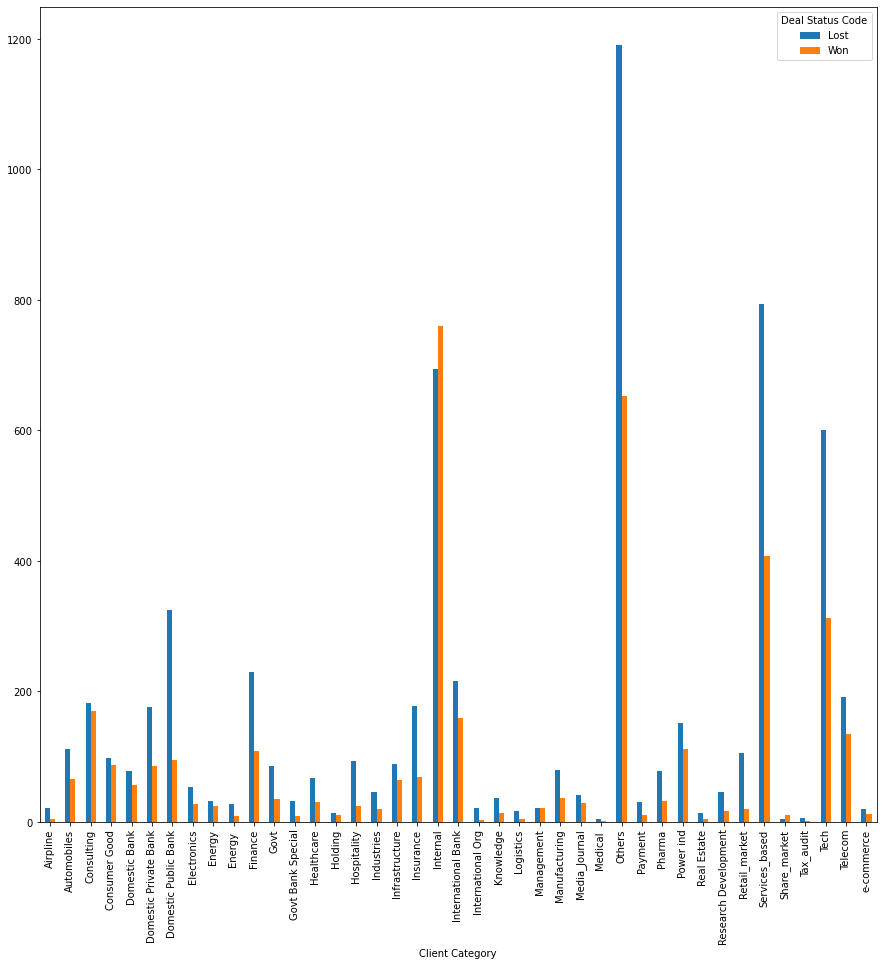

In [26]:
Deal_Status_Client_Category.plot.bar(figsize=(15,15))

<AxesSubplot:xlabel='Sector', ylabel='count'>

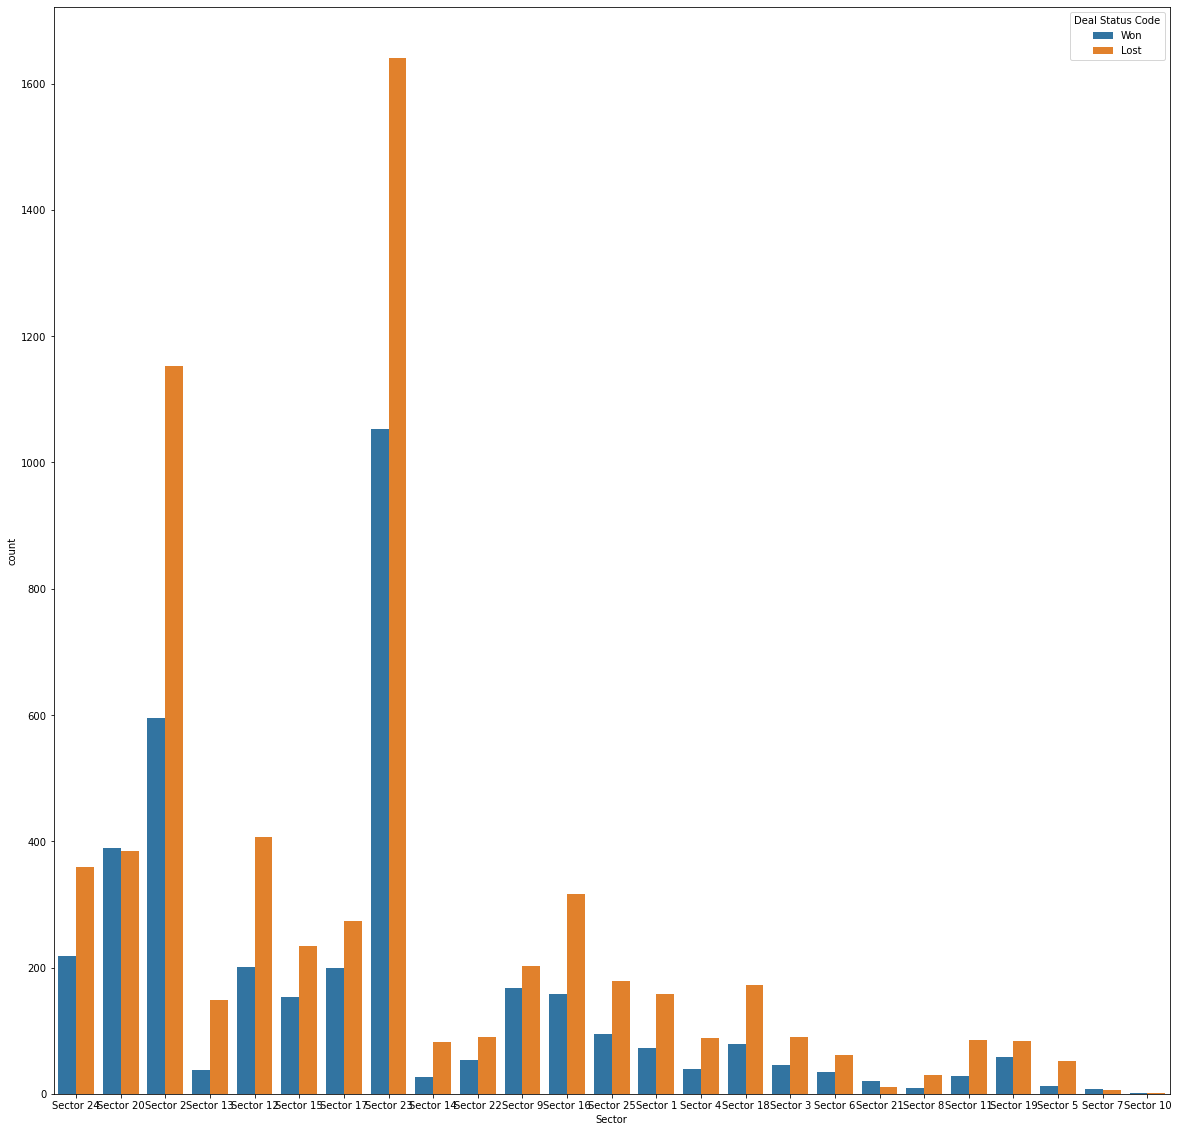

In [27]:
plt.figure(figsize=(20,20))
sns.countplot(x="Sector",hue="Deal Status Code",data=data)

In [28]:
Deal_Status_Solution_Type=pd.crosstab(index=data["Solution Type"], columns=data["Deal Status Code"])
Deal_Status_Solution_Type

Deal Status Code,Lost,Won
Solution Type,,
Solution 1,2,3
Solution 10,690,326
Solution 11,88,52
Solution 12,342,98
Solution 13,214,98
Solution 14,42,28
Solution 15,6,2
Solution 16,18,6
Solution 17,6,2


<AxesSubplot:xlabel='Solution Type'>

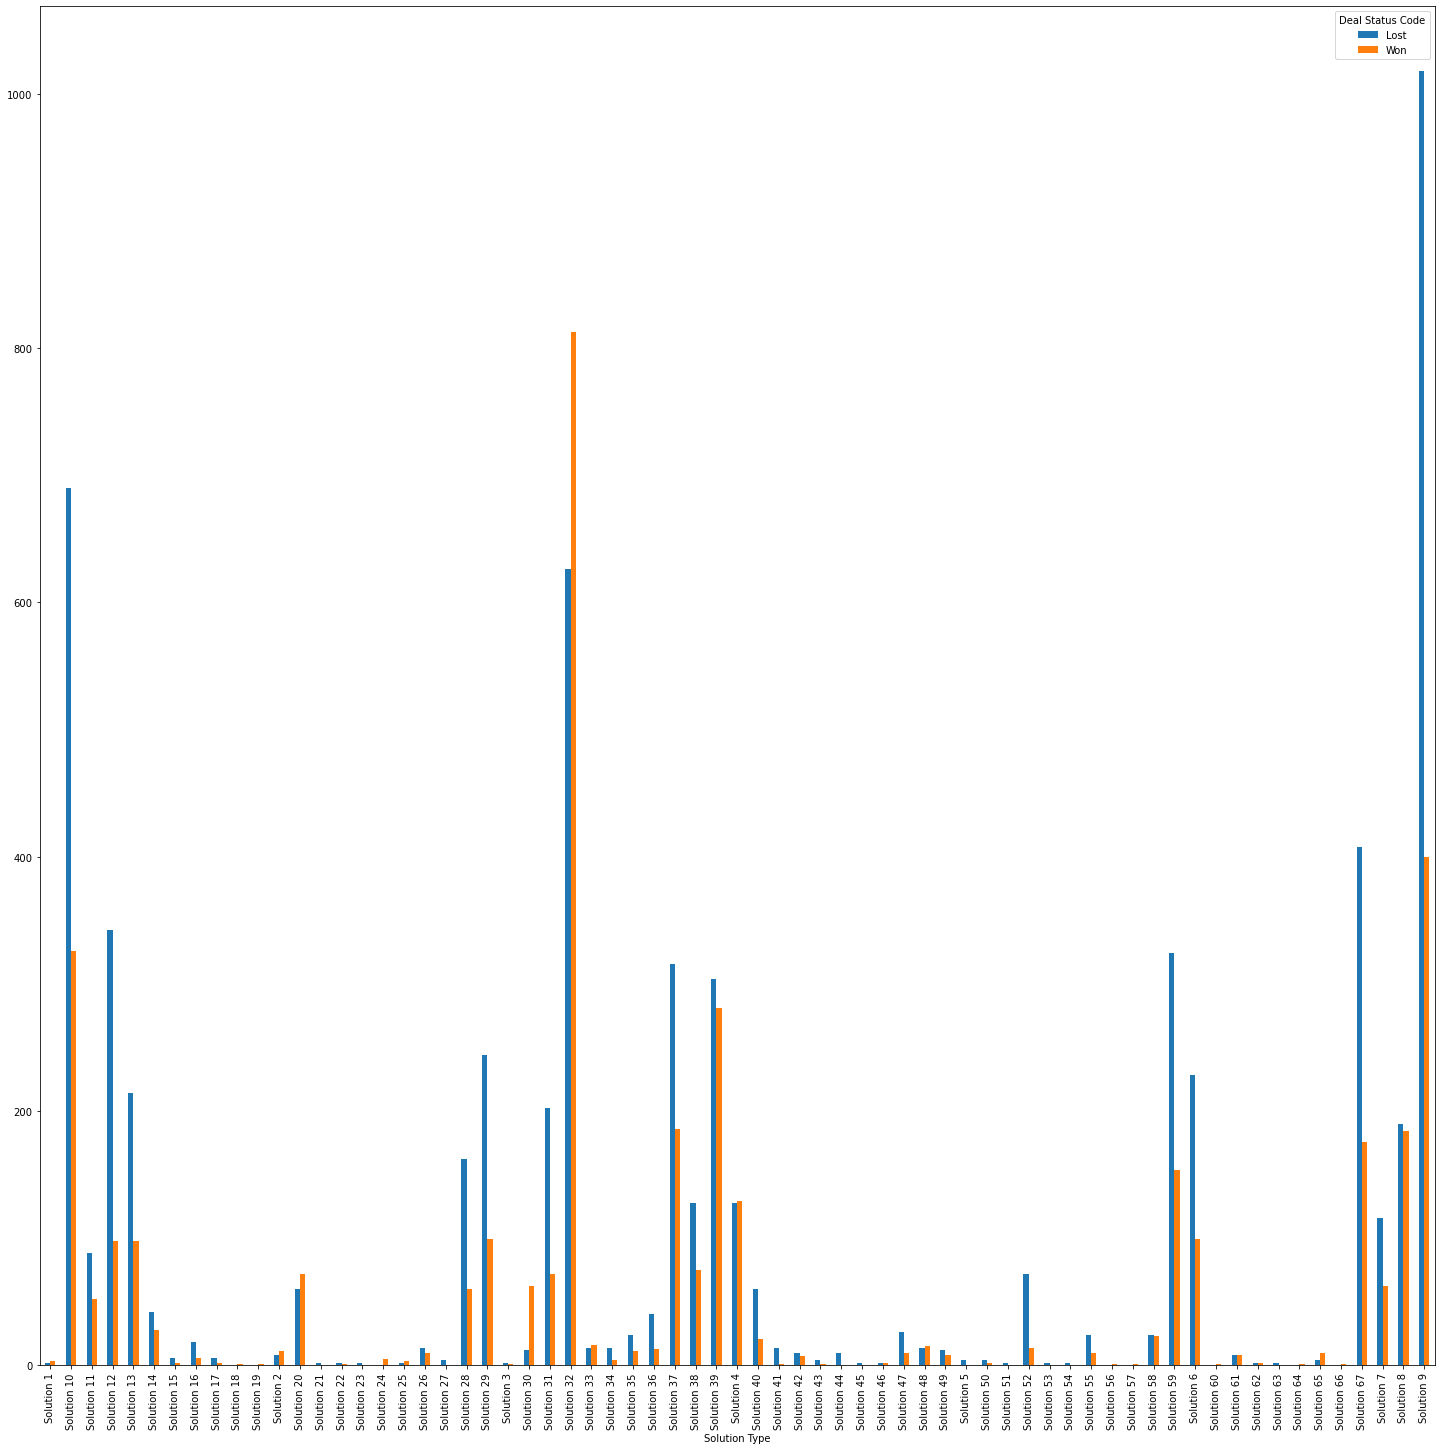

In [29]:
Deal_Status_Solution_Type.plot.bar(figsize=(25,25))

In [30]:
Deal_Status_Sector=pd.crosstab(index=data["Sector"], columns=data["Deal Status Code"])
Deal_Status_Sector

Deal Status Code,Lost,Won
Sector,,
Sector 1,158,73
Sector 10,2,1
Sector 11,86,28
Sector 12,406,201
Sector 13,148,37
Sector 14,82,27
Sector 15,234,153
Sector 16,316,158
Sector 17,274,200


<AxesSubplot:xlabel='Sector'>

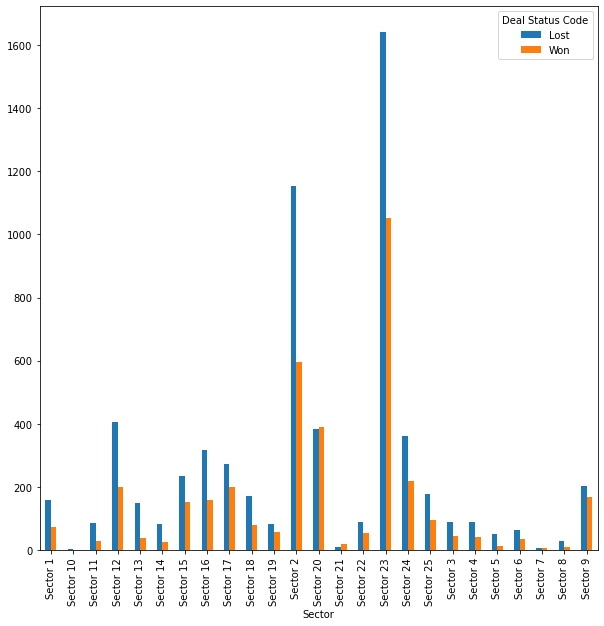

In [31]:
Deal_Status_Sector.plot.bar(figsize=(10,10))

<AxesSubplot:xlabel='Deal Cost', ylabel='Density'>

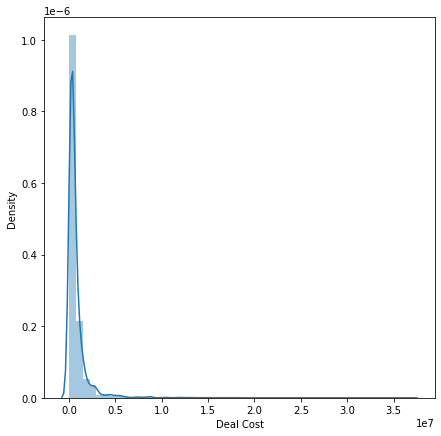

In [32]:
plt.figure(figsize=(7,7))
sns.distplot(data["Deal Cost"])

<AxesSubplot:xlabel='VP Name', ylabel='Deal Cost'>

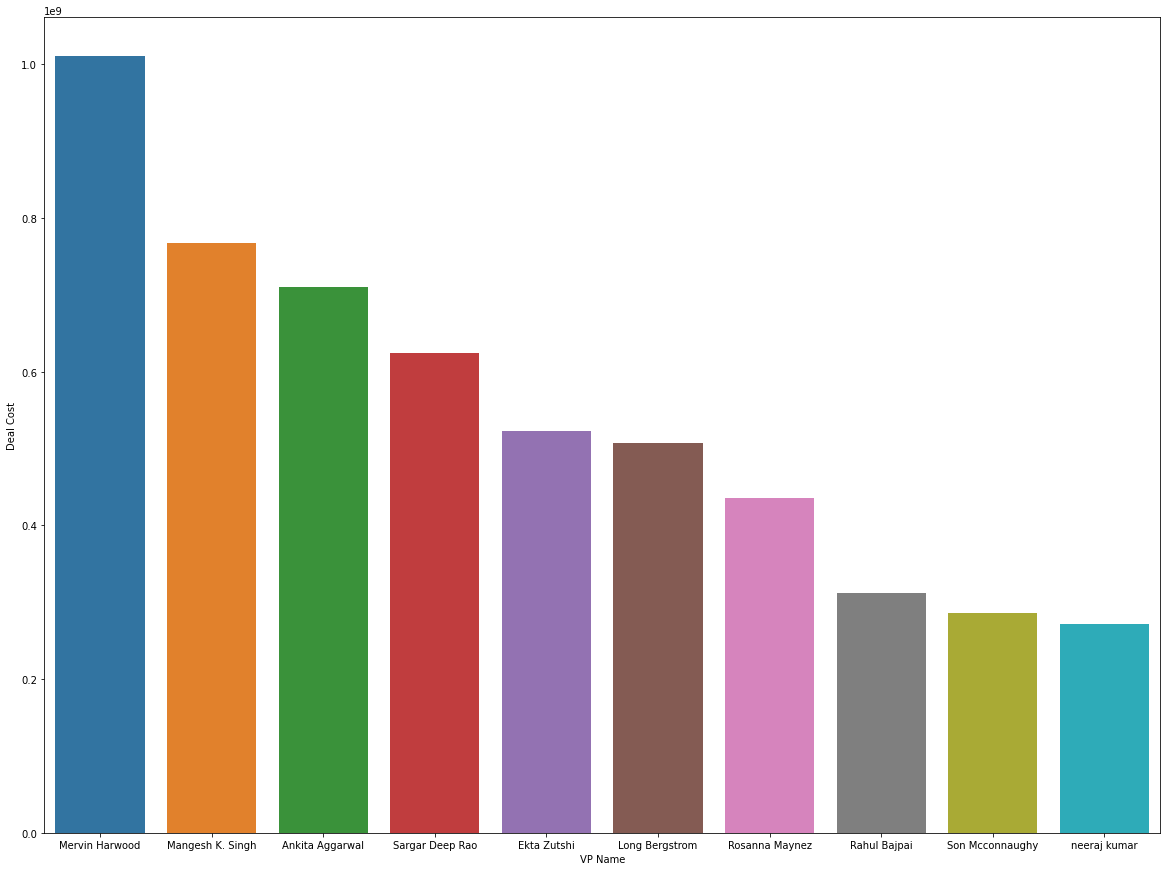

In [33]:
total_vp_deal_cost=data.groupby("VP Name", as_index = False)['Deal Cost'].sum().sort_values(by="Deal Cost", ascending = False)
plt.figure(figsize=(20,15))
top10_total_vp_deal_cost=total_vp_deal_cost[:10]
sns.barplot(x="VP Name", y="Deal Cost", data=top10_total_vp_deal_cost)

<AxesSubplot:xlabel='Manager Name', ylabel='Deal Cost'>

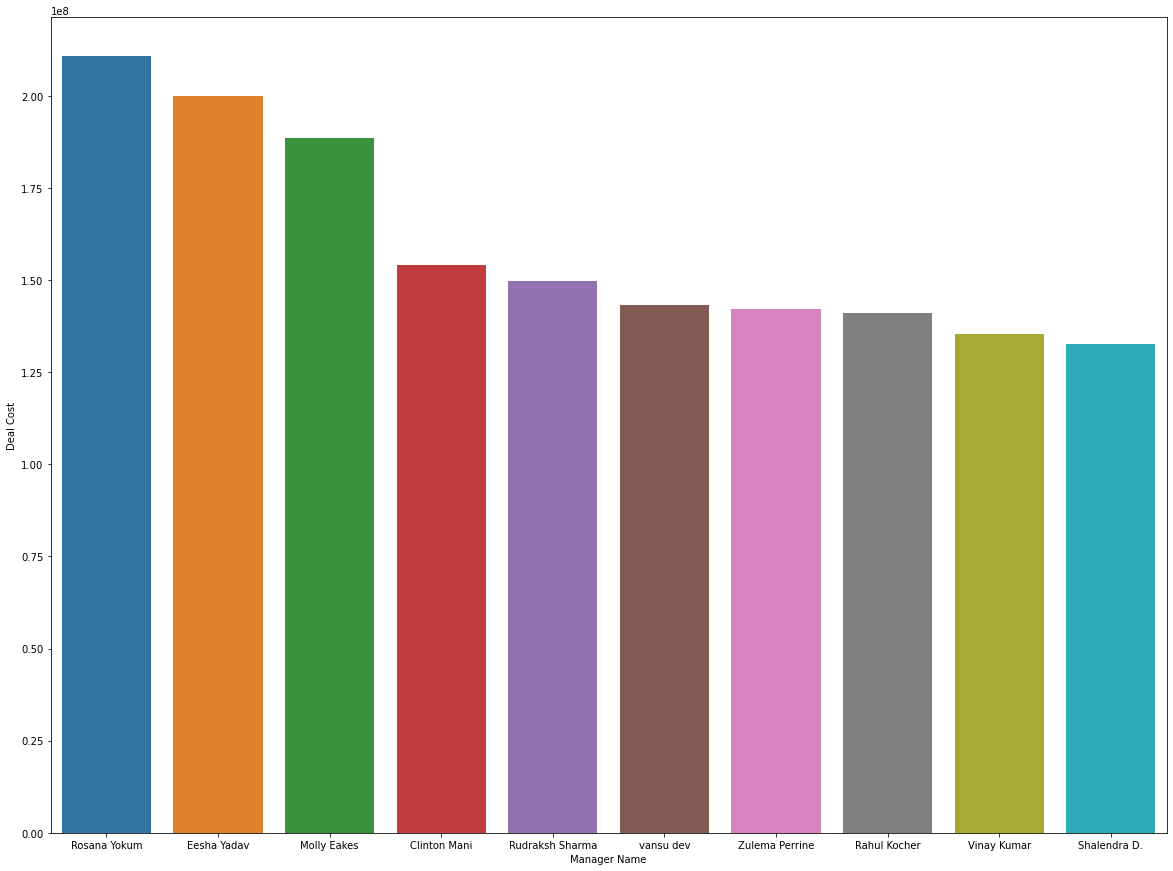

In [34]:
total_manager_deal_cost=data.groupby("Manager Name", as_index = False)['Deal Cost'].sum().sort_values(by="Deal Cost", ascending = False)
plt.figure(figsize=(20,15))
top10_total_manager_deal_cost=total_manager_deal_cost[:10]
sns.barplot(x="Manager Name", y="Deal Cost", data=top10_total_manager_deal_cost)

# VP Win Percentage

In [35]:
Deal_Status_VP_Name=pd.crosstab(index=data["VP Name"], columns=data["Deal Status Code"])
Deal_Status_VP_Name

Deal Status Code,Lost,Won
VP Name,,
Alam Syed,62,64
Ankita Aggarwal,866,277
Brendon Wycoff,132,57
Clinton Mani,124,60
Dennis Faux,12,1
Earline Langton,52,30
Ekta Zutshi,206,344
Gaurav Sameria,66,48
Gayle Molter,74,30


In [36]:
Deal_Status_VP_Name["Total"]=Deal_Status_VP_Name["Won"]+Deal_Status_VP_Name["Lost"]

In [37]:
Deal_Status_VP_Name["VP Win Percentage"]=(Deal_Status_VP_Name["Won"]/Deal_Status_VP_Name["Total"])*100

In [38]:
Deal_Status_VP_Name

Deal Status Code,Lost,Won,Total,VP Win Percentage
VP Name,,,,
Alam Syed,62,64,126,50.793651
Ankita Aggarwal,866,277,1143,24.234471
Brendon Wycoff,132,57,189,30.158730
Clinton Mani,124,60,184,32.608696
Dennis Faux,12,1,13,7.692308
Earline Langton,52,30,82,36.585366
Ekta Zutshi,206,344,550,62.545455
Gaurav Sameria,66,48,114,42.105263
Gayle Molter,74,30,104,28.846154


In [39]:
a= Deal_Status_VP_Name["Won"]

In [40]:
a=a.sort_values(ascending = False)
a.head()

VP Name
Long Bergstrom     471
Mervin Harwood     372
Sargar Deep Rao    346
Ekta Zutshi        344
Ankita Aggarwal    277
Name: Won, dtype: int64

<AxesSubplot:title={'center':'Top 5 VP with Most Wins'}, xlabel='VP Name'>

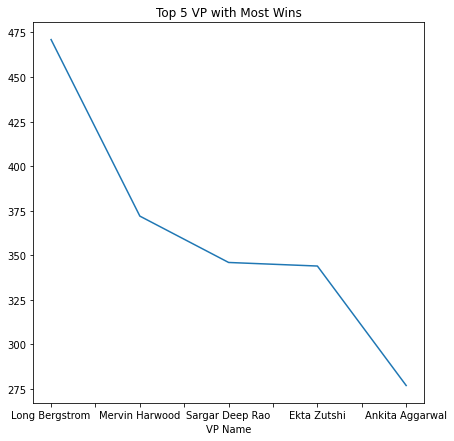

In [41]:
plt.figure(figsize=(7,7))
plt.title("Top 5 VP with Most Wins")
a.head().plot()

# Manager Win Percentage

In [42]:
Deal_Status_Manager_Name=pd.crosstab(index=data["Manager Name"], columns=data["Deal Status Code"])
Deal_Status_Manager_Name

Deal Status Code,Lost,Won
Manager Name,,
Aastha Gandhi,0,1
Abhinav Warrier,80,15
Abhishek Singhal,44,23
Abhiskek Kumar,56,38
Abhiskhek D,36,25
Abram Fines,10,29
Aditya Kumar,4,4
Aditya Tondon,2,0
Ahdarsha Jha,22,4


In [43]:
Deal_Status_Manager_Name["Total"]=Deal_Status_Manager_Name["Lost"] + Deal_Status_Manager_Name["Won"]

In [44]:
Deal_Status_Manager_Name["Manager Win Percentage"]=(Deal_Status_Manager_Name["Won"]/Deal_Status_Manager_Name["Total"])*100

In [45]:
Deal_Status_Manager_Name 

Deal Status Code,Lost,Won,Total,Manager Win Percentage
Manager Name,,,,
Aastha Gandhi,0,1,1,100.000000
Abhinav Warrier,80,15,95,15.789474
Abhishek Singhal,44,23,67,34.328358
Abhiskek Kumar,56,38,94,40.425532
Abhiskhek D,36,25,61,40.983607
Abram Fines,10,29,39,74.358974
Aditya Kumar,4,4,8,50.000000
Aditya Tondon,2,0,2,0.000000
Ahdarsha Jha,22,4,26,15.384615


In [46]:
b=Deal_Status_Manager_Name["Won"]
b=b.sort_values(ascending = False)
b.head()

Manager Name
Molly Eakes        109
Rudraksh Sharma     94
Russell Dahlen      91
Rayford Durgan      76
Manpreet Singh      75
Name: Won, dtype: int64

<AxesSubplot:title={'center':'Top 5 Manager with Most Wins'}, xlabel='Manager Name'>

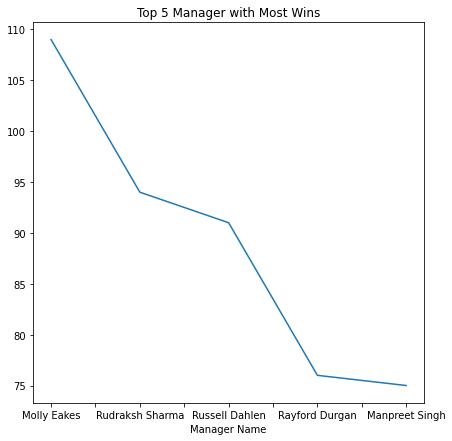

In [47]:
plt.figure(figsize=(7,7))
plt.title("Top 5 Manager with Most Wins")
b.head().plot()

# Top Vp-Manager Combination

In [48]:
data["Deal Status Code"].value_counts()

Lost    6306
Won     3755
Name: Deal Status Code, dtype: int64

In [49]:
data.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost


In [50]:
c_y={"Deal Status Code" : {"Won": 1 ,"Lost": 0 }}
data.replace(c_y, inplace = True)
data.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,1
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,1
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,0
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,0
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,0


In [51]:
vp_manager=data.groupby(["VP Name","Manager Name"],as_index = False).agg({"Deal Status Code":['sum','count']})

In [52]:
vp_manager.head()

VP Name            Manager Name Deal Status Code      
                                                  sum count
0  Alam Syed         Abhinav Warrier                0     2
1  Alam Syed               Alam Syed                2     2
2  Alam Syed              Darin Vath               17    25
3  Alam Syed  Deepak Chandra Prakash                6    14
4  Alam Syed             Dennis Faux                1     1

In [53]:
vp_manager["Win Percentage"]=(vp_manager["Deal Status Code"]["sum"]/vp_manager["Deal Status Code"]["count"])*100

In [54]:
vp_manager.head()

VP Name            Manager Name Deal Status Code       Win Percentage
                                                  sum count               
0  Alam Syed         Abhinav Warrier                0     2       0.000000
1  Alam Syed               Alam Syed                2     2     100.000000
2  Alam Syed              Darin Vath               17    25      68.000000
3  Alam Syed  Deepak Chandra Prakash                6    14      42.857143
4  Alam Syed             Dennis Faux                1     1     100.000000

In [55]:
x=vp_manager.sort_values(["VP Name","Win Percentage"], ascending = False)

In [56]:
x1=x.sort_values(["Win Percentage"],ascending = False)

In [57]:
x1.head()

VP Name     Manager Name Deal Status Code       Win Percentage
                                                    sum count               
922          som dutt     Abhiskhek  D                1     1          100.0
710   Sargar Deep Rao      Akhil Biyas                2     2          100.0
396  Mangesh K. Singh    Ganesh Malwar                1     1          100.0
451    Manpreet Singh      Rishab Jain                2     2          100.0
449    Manpreet Singh  Rajneesh Tanwar                1     1          100.0

In [58]:
VP_Name=x1["VP Name"]
Manager_Name=x1["Manager Name"]
Deal_Status_Code_sum=x1["Deal Status Code"]["sum"]
Deal_Status_Code_count=x1["Deal Status Code"]["count"]
Win_Percentage=x1["Win Percentage"]

In [59]:
x1_new=pd.concat([VP_Name,Manager_Name,Deal_Status_Code_sum,Deal_Status_Code_count,Win_Percentage], axis =1)

In [60]:
x1_new.head()

,VP Name,Manager Name,sum,count,Win Percentage
922,som dutt,Abhiskhek D,1,1,100.0
710,Sargar Deep Rao,Akhil Biyas,2,2,100.0
396,Mangesh K. Singh,Ganesh Malwar,1,1,100.0
451,Manpreet Singh,Rishab Jain,2,2,100.0
449,Manpreet Singh,Rajneesh Tanwar,1,1,100.0


In [61]:
x1_new.sort_values(["Win Percentage","count"], ascending = False)

,VP Name,Manager Name,sum,count,Win Percentage
916,neeraj kumar,gurmit singh,18,18,100.000000
679,Rudraksh Sharma,Preetan Gujar,10,10,100.000000
692,Russell Dahlen,Martin Cheyne,10,10,100.000000
157,Ekta Zutshi,Ekta Zutshi,10,10,100.000000
945,som dutt,Roop Sachdeva,9,9,100.000000
719,Sargar Deep Rao,Doreen Amerman,8,8,100.000000
158,Ekta Zutshi,Ganesh Malwar,8,8,100.000000
538,Mervin Harwood,rahul sharma,6,6,100.000000
321,Lilli Storrs,Md. Daud,6,6,100.000000
743,Sargar Deep Rao,Ralph Bohon,6,6,100.000000


# Dropping Deal Date Column

In [62]:
data=data.drop(["Deal Date"], axis =1)

In [63]:
data.head()

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,1
1,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,1
2,Internal,Solution 59,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,0
3,Internal,Solution 59,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,0
4,Internal,Solution 32,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,0


# Checking correlation

In [64]:
df1 = data.apply( lambda x : pd.factorize(x)[0]).corr(method = "pearson", min_periods = 1); df1

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
Client Category,1.000000,-0.000288,0.415474,-0.058440,0.065936,0.065094,-0.067462,0.066413
Solution Type,-0.000288,1.000000,-0.005967,-0.062212,0.104661,0.091017,0.076684,0.094455
Sector,0.415474,-0.005967,1.000000,0.026685,0.068515,0.045726,-0.072981,0.030751
Location,-0.058440,-0.062212,0.026685,1.000000,0.058452,0.011930,0.025903,0.048104
VP Name,0.065936,0.104661,0.068515,0.058452,1.000000,0.386554,0.070383,0.033829
Manager Name,0.065094,0.091017,0.045726,0.011930,0.386554,1.000000,0.098902,-0.017289
Deal Cost,-0.067462,0.076684,-0.072981,0.025903,0.070383,0.098902,1.000000,-0.202247
Deal Status Code,0.066413,0.094455,0.030751,0.048104,0.033829,-0.017289,-0.202247,1.000000


<AxesSubplot:>

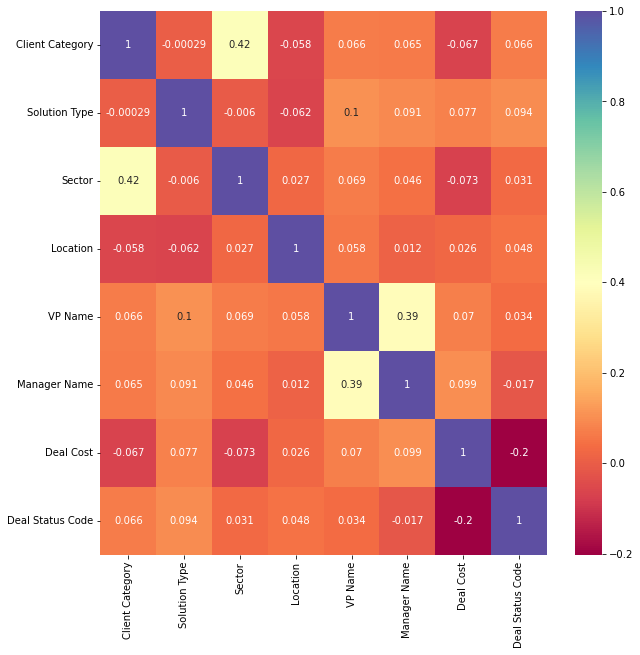

In [65]:
plt.figure(figsize=(10,10))
sns.heatmap(df1,cmap="Spectral",annot = True)


In [66]:
data.head()

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,1
1,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,1
2,Internal,Solution 59,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,0
3,Internal,Solution 59,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,0
4,Internal,Solution 32,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,0


# Target Encoding

In [67]:
from category_encoders import TargetEncoder
cols= ["Solution Type","Client Category","Sector","Location","VP Name","Manager Name"] # add VP_Manager_Name add Client_Sector_Category
target= 'Deal Status Code'
for col in cols:
    te= TargetEncoder()
    te.fit(X=data[cols], y=data[target])
    values = te.transform(data[cols])


In [68]:
values.head()

,Solution Type,Client Category,Sector,Location,VP Name,Manager Name
0,0.348315,0.412844,0.377163,0.402062,0.625455,0.418605
1,0.348315,0.412844,0.377163,0.402062,0.625455,0.418605
2,0.322176,0.522696,0.503234,0.478580,0.625455,0.636364
3,0.322176,0.522696,0.503234,0.478580,0.625455,0.636364
4,0.564976,0.522696,0.503234,0.478580,0.625455,0.636364


In [69]:
data.head()

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,1
1,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,1
2,Internal,Solution 59,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,0
3,Internal,Solution 59,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,0
4,Internal,Solution 32,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,0


In [70]:
data=data.drop(["Solution Type","Location","Client Category","Sector","VP Name", "Manager Name"], axis = 1) # add VP_Manager_Name, add Client_Sector_Category

In [71]:
df=pd.concat([data,values],axis =1)

In [72]:
df.head()

,Deal Cost,Deal Status Code,Solution Type,Client Category,Sector,Location,VP Name,Manager Name
0,150000.00,1,0.348315,0.412844,0.377163,0.402062,0.625455,0.418605
1,744705.88,1,0.348315,0.412844,0.377163,0.402062,0.625455,0.418605
2,60000.00,0,0.322176,0.522696,0.503234,0.478580,0.625455,0.636364
3,60000.00,0,0.322176,0.522696,0.503234,0.478580,0.625455,0.636364
4,80882.35,0,0.564976,0.522696,0.503234,0.478580,0.625455,0.636364


# Checking target variables, imbalance dataset

In [73]:
df["Deal Status Code"].value_counts()

0    6306
1    3755
Name: Deal Status Code, dtype: int64

In [74]:
deal_status_code_Won=df[df["Deal Status Code"]== 1]

In [75]:
deal_status_code_Won.head()

,Deal Cost,Deal Status Code,Solution Type,Client Category,Sector,Location,VP Name,Manager Name
0,150000.00,1,0.348315,0.412844,0.377163,0.402062,0.625455,0.418605
1,744705.88,1,0.348315,0.412844,0.377163,0.402062,0.625455,0.418605
6,526176.47,1,0.322176,0.522696,0.340961,0.336310,0.319039,0.995805
8,1032352.94,1,0.411765,0.470270,0.331137,0.336310,0.461538,0.440000
10,316176.47,1,0.302752,0.425532,0.340961,0.336310,0.511401,0.397590


In [76]:
deal_status_code_Lost=df[df["Deal Status Code"]== 0]

In [77]:
deal_status_code_Lost.head()

,Deal Cost,Deal Status Code,Solution Type,Client Category,Sector,Location,VP Name,Manager Name
2,60000.00,0,0.322176,0.522696,0.503234,0.478580,0.625455,0.636364
3,60000.00,0,0.322176,0.522696,0.503234,0.478580,0.625455,0.636364
4,80882.35,0,0.564976,0.522696,0.503234,0.478580,0.625455,0.636364
5,80882.35,0,0.564976,0.522696,0.503234,0.478580,0.625455,0.636364
7,409705.88,0,0.348315,0.289256,0.200000,0.402062,0.361925,0.289720


In [78]:
deal_status_code_Won.shape

(3755, 8)

In [79]:
deal_status_code_Lost.shape

(6306, 8)

In [80]:
count_deal_status_code_0, count_deal_status_code_1= df["Deal Status Code"].value_counts()

In [81]:
count_deal_status_code_0

6306

In [82]:
count_deal_status_code_1

3755

# Under Sampling

In [83]:
deal_status_code_Lost_under_sampled=deal_status_code_Lost.sample(count_deal_status_code_1)

In [84]:
deal_status_code_Lost_under_sampled.shape

(3755, 8)

# Over Sampling

In [85]:
deal_status_code_Won_over_sampled=deal_status_code_Won.sample((count_deal_status_code_0), replace = True)

In [86]:
deal_status_code_Won_over_sampled.shape

(6306, 8)

In [87]:
balance_dataset=pd.concat((deal_status_code_Lost, deal_status_code_Won_over_sampled), axis=0)

In [88]:
balance_dataset.head()

,Deal Cost,Deal Status Code,Solution Type,Client Category,Sector,Location,VP Name,Manager Name
2,60000.00,0,0.322176,0.522696,0.503234,0.478580,0.625455,0.636364
3,60000.00,0,0.322176,0.522696,0.503234,0.478580,0.625455,0.636364
4,80882.35,0,0.564976,0.522696,0.503234,0.478580,0.625455,0.636364
5,80882.35,0,0.564976,0.522696,0.503234,0.478580,0.625455,0.636364
7,409705.88,0,0.348315,0.289256,0.200000,0.402062,0.361925,0.289720


In [89]:
balance_dataset["Deal Status Code"].value_counts()

0    6306
1    6306
Name: Deal Status Code, dtype: int64

Text(0, 0.5, ' Deal Status Code')

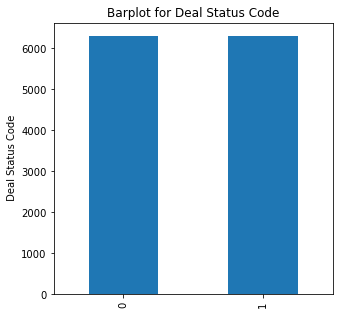

In [90]:
plt.figure(figsize=(5,5))
balance_dataset["Deal Status Code"].value_counts().plot(kind="bar")
plt.title("Barplot for Deal Status Code")
plt.ylabel(" Deal Status Code")

# Splitting dataset into train and test

In [91]:
from sklearn.model_selection import train_test_split
x=balance_dataset.drop(['Deal Status Code'], axis =1)
y=balance_dataset['Deal Status Code']

In [92]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=123, test_size=0.3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8828, 7), (3784, 7), (8828,), (3784,))

# Decision Tree

In [93]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion="entropy",random_state=0)

In [94]:
model_dt=dt.fit(x_train,y_train)

In [95]:
y_pred_DT=model_dt.predict(x_test)
y_pred_DT

array([0, 1, 1, ..., 1, 0, 0])

In [96]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [97]:
print(classification_report(y_test,y_pred_DT))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1926
           1       0.89      0.87      0.88      1858

    accuracy                           0.88      3784
   macro avg       0.88      0.88      0.88      3784
weighted avg       0.88      0.88      0.88      3784



In [98]:
matrix=confusion_matrix(y_test,y_pred_DT)
print(matrix)

[[1724  202]
 [ 239 1619]]


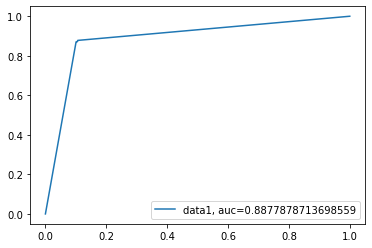

In [99]:
from sklearn import metrics
y_pred_proba=model_dt.predict_proba(x_test)[::,1]
fpr,tpr, _ =metrics.roc_curve(y_test,y_pred_proba)
auc=metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="data1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# KNN 

In [100]:
from sklearn.neighbors import KNeighborsClassifier
neigh=KNeighborsClassifier(n_neighbors=11, weights="uniform",algorithm="auto")
neigh.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [101]:
y_pred_knn= neigh.predict(x_test)
y_pred_knn

array([1, 0, 0, ..., 1, 0, 0])

In [102]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70      1926
           1       0.69      0.70      0.70      1858

    accuracy                           0.70      3784
   macro avg       0.70      0.70      0.70      3784
weighted avg       0.70      0.70      0.70      3784



In [103]:
print(confusion_matrix(y_test,y_pred_knn))

[[1334  592]
 [ 550 1308]]


# Random Forest 

In [104]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
rfcmodel=rfc.fit(x_train,y_train)

In [105]:
from sklearn.metrics import classification_report,confusion_matrix

In [106]:
y_pred_RF=rfcmodel.predict(x_test)
y_pred_RF

array([0, 1, 0, ..., 1, 0, 0])

In [107]:
print(classification_report(y_test,y_pred_RF))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1926
           1       0.91      0.88      0.89      1858

    accuracy                           0.90      3784
   macro avg       0.90      0.90      0.90      3784
weighted avg       0.90      0.90      0.90      3784



In [108]:
matrix=confusion_matrix(y_test,y_pred_RF)
print(matrix)

[[1758  168]
 [ 223 1635]]


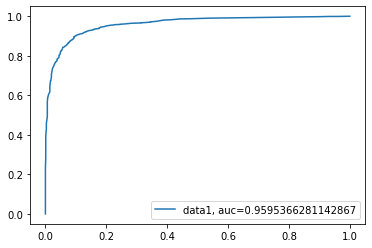

In [109]:
y_pred_proba=rfcmodel.predict_proba(x_test)[::,1]
fpr,tpr, _ =metrics.roc_curve(y_test,y_pred_proba)
auc=metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="data1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Hyper Parameter Tuning for Random Forest

In [110]:
parameters={
    'n_estimators': [100,150,200,250,300,400],
    'max_depth':[2,4,6,10,20],
    'min_samples_split':[2,5,10,20,35,50],
    'min_samples_leaf':[1,2,10,50,100,150,200], #important #default numbers   
}

# Random Search CV

In [111]:
random_forest=RandomForestClassifier()
from sklearn.model_selection import RandomizedSearchCV
rf_randomGrid=RandomizedSearchCV(estimator = random_forest, param_distributions=parameters,cv=10,verbose =2, n_jobs =4)


In [112]:
rf_randomGrid.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END max_depth=20, min_samples_leaf=100, min_samples_split=50, n_estimators=250; total time=   0.8s
[CV] END max_depth=20, min_samples_leaf=100, min_samples_split=50, n_estimators=250; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=50, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=50, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=50, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=50, min_samples_split=2, n_estimators=300; total time=   1.0s
[CV] END max_depth=20, min_samples_leaf=50, min_samples_split=2, n_estimators=300; total time=   1.0s
[CV] END max_depth=20, min_samples_leaf=50, min_samples_split=2, n_estimators=300; total time=   1.0s
[CV] END max_depth=20, min_samples_leaf=10, min_samples_split=35, n_estimators=300; total time=   1.3s
[CV] END max_d

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'max_depth': [2, 4, 6, 10, 20],
                                        'min_samples_leaf': [1, 2, 10, 50, 100,
                                                             150, 200],
                                        'min_samples_split': [2, 5, 10, 20, 35,
                                                              50],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 400]},
                   verbose=2)

In [113]:
rf_randomGrid.best_params_

{'n_estimators': 300,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_depth': 20}

# Random Forest Model with best Parameters

In [114]:
better_model=RandomForestClassifier(max_depth=20,min_samples_leaf = 1,min_samples_split = 2,n_estimators =250)

In [115]:
better_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=20, n_estimators=250)

In [116]:
y_pred_better_model=better_model.predict(x_test)

In [117]:
print(classification_report(y_test,y_pred_better_model))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1926
           1       0.91      0.88      0.90      1858

    accuracy                           0.90      3784
   macro avg       0.90      0.90      0.90      3784
weighted avg       0.90      0.90      0.90      3784



In [118]:
print(confusion_matrix(y_test,y_pred_better_model))

[[1760  166]
 [ 218 1640]]


# Xgboost

In [119]:
from xgboost import XGBClassifier

In [120]:
import warnings 
warnings.filterwarnings('ignore')

In [121]:
from sklearn.model_selection import cross_val_score
xgboost_model=XGBClassifier()
xgboost_model.fit(x_train,y_train)

[17:44:58] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [122]:
model = XGBClassifier()
model.fit(x_train, y_train)
y_pred_xg = model.predict(x_test)

[17:44:58] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [123]:
print(classification_report(y_test, y_pred_xg))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1926
           1       0.82      0.82      0.82      1858

    accuracy                           0.82      3784
   macro avg       0.82      0.82      0.82      3784
weighted avg       0.82      0.82      0.82      3784



In [124]:
print(confusion_matrix(y_test,y_pred_xg))

[[1593  333]
 [ 330 1528]]


# Hyperparameter Tuning for XGboost 

In [125]:
#Hyper Parameter Parameters 

params={
    "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30,0.50,0.70,0.90],
    "max_depth" : [3,4,5,6,8,10,12,15,20,25,30,35],
    "min_child_weight" : [1,3,5,7,11],
    "gamma" : [0.0,0.1,0.2,0.3,0.4,0.6],
    "colsample_bytree" : [0.3,0.4,0.5,0.7,0.9],
    "n_estimator" : [150,250,300,500]
}

In [126]:
from sklearn.model_selection import RandomizedSearchCV

In [127]:
import xgboost
classifier=xgboost.XGBClassifier()

In [128]:
random_search=RandomizedSearchCV(classifier, param_distributions=params,n_iter=5,scoring="roc_auc",n_jobs = -1, cv=5,verbose = 1)



In [129]:
random_search.fit(x_train,y_train)

[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.6s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=20, n_estimators=300; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=20, n_estimators=300; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=5, n_estimators=250; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=5, n_estimators=250; total time=   0.6s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=20, n_estimators=200; total time=   0.6s
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=20, n_estimators=200; total time=   0.6s
[CV] END max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=250; total time=   0.5s
[CV] END max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=250; total time=   0.5s
[CV] END max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=250; tot

/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of 

/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of 

[17:45:16] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:45:16] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           validate_parameters=None,
                                           verbosity=None),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.7,
                                                             0.9],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 0.6],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3, 0.5, 0.7,
                                                          0.9],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12, 15,
                                                      20, 25, 30, 35],
                                        'min_child_weight': [1, 3, 5, 7, 11],
                                        'n_estimator': [150, 250, 300, 500]},
                   scoring='roc_auc', verbose=1)

In [130]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, gamma=0.4, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=35,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimator=500, n_estimators=100, n_jobs=8, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [131]:
random_search.best_params_

{'n_estimator': 500,
 'min_child_weight': 1,
 'max_depth': 35,
 'learning_rate': 0.25,
 'gamma': 0.4,
 'colsample_bytree': 0.4}

In [132]:
import xgboost
classifier_best_params=xgboost.XGBClassifier(n_estimator=300,min_child_weight = 1,max_depth= 20,learning_rate=0.7,gamma = 0.4,colsample_bytree = 0.7)


In [133]:
classifier_best_params.fit(x_train,y_train)

[17:45:17] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:45:17] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, gamma=0.4, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.7, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimator=300, n_estimators=100, n_jobs=8, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [134]:
y_pred_classifier=classifier_best_params.predict(x_test)

In [135]:
print(classification_report(y_test,y_pred_classifier))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1926
           1       0.90      0.88      0.89      1858

    accuracy                           0.89      3784
   macro avg       0.89      0.89      0.89      3784
weighted avg       0.89      0.89      0.89      3784



In [136]:
print(confusion_matrix(y_test,y_pred_classifier))

[[1746  180]
 [ 225 1633]]


In [137]:
type2=x_test[(y_pred_classifier == 1) & (y_test == 0)]  #one way
type2.shape

(180, 7)

In [138]:
type1=x_test[(y_pred_classifier == 0) & (y_test == 1)] #one way
type1.shape

(225, 7)

In [139]:
join=x_test[y_test != y_pred_classifier] #2nd way
join.head()

,Deal Cost,Solution Type,Client Category,Sector,Location,VP Name,Manager Name
9599,188235.29,0.370518,0.339434,0.421941,0.336310,0.326087,0.126761
1819,352941.18,0.320866,0.339434,0.331137,0.402062,0.361925,0.348148
8311,1441176.47,0.302752,0.353963,0.571428,0.402062,0.421053,0.333333
6293,227352.94,0.288630,0.226730,0.340961,0.336310,0.319039,0.196850
7741,2117647.06,0.564976,0.482955,0.391014,0.419847,0.476190,0.511111


In [140]:
join["Deal Cost"].sum()

290100882.56

In [141]:
join.shape

(405, 7)

In [142]:
join["Deal Cost"].sum()/382

759426.3941361257